In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('../data_cleaned/merged_data.csv')

In [4]:
df

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,...,imdb_id,original_language,popularity,genres,production_companies,production_countries,spoken_languages,film_oscar_nominee,company_nominated,license
0,0,299534,Avengers: Endgame,8.263,23857,Released,2019-04-24,2800000000,181,False,...,tt4154796,en,91.756,Adventure,Marvel Studios,United States of America,"English, Japanese, Xhosa",1.0,0,PG-13
1,1,475557,Joker,8.168,23425,Released,2019-10-01,1074458282,122,False,...,tt7286456,en,54.522,Crime,"Warner Bros. Pictures, Joint Effort, Village R...","Canada, United States of America",English,1.0,1,R
2,2,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,...,tt10872600,en,186.065,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",1.0,0,PG-13
3,3,299537,Captain Marvel,6.843,14657,Released,2019-03-06,1131416446,124,False,...,tt4154664,en,50.399,Action,Marvel Studios,United States of America,English,0.0,0,PG-13
4,4,429617,Spider-Man: Far From Home,7.447,14495,Released,2019-06-28,1131927996,129,False,...,tt6320628,en,49.913,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"Czech, Dutch, English, German, Italian",0.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,647,884184,Consecration,5.825,105,Released,2023-02-09,1504289,90,False,...,tt14993352,en,48.774,Horror,"AGC Studios, Bigscope Films, Moonriver Content","United Kingdom, United States of America",English,0.0,0,unknown
637,648,893086,The Good Neighbor,6.952,105,Released,2022-06-17,94909,97,False,...,tt14349032,en,13.842,Thriller,"Forma Pro Films, Altit Media Group","United States of America, Latvia",English,0.0,0,unknown
638,649,639247,Dreamkatcher,5.231,104,Released,2020-06-24,375836,85,False,...,tt10553210,en,7.720,Horror,Taylor Lane Productions,United States of America,English,0.0,0,unknown
639,650,727097,Archenemy,5.306,103,Released,2020-11-30,136240,90,False,...,tt11274100,en,8.290,Action,"SpectreVision, Legion M, RLJ Entertainment, He...",United States of America,English,0.0,0,unknown


In [5]:
df.isna().sum()

Unnamed: 0              0
id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
imdb_id                 0
original_language       0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
film_oscar_nominee      0
company_nominated       0
license                 0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'adult', 'budget', 'imdb_id',
       'original_language', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'film_oscar_nominee',
       'company_nominated', 'license'],
      dtype='object')

# Which movie genres are most popular among audiences during this period?

In [7]:
unique_genres = df['genres'].unique()
print("Unique Genres:", unique_genres)

Unique Genres: ['Adventure' 'Crime' 'Action' 'Comedy' 'War' 'Science Fiction' 'Animation'
 'Family' 'Horror' 'Fantasy' 'Thriller' 'Romance' 'Drama' 'Music'
 'Mystery' 'History' 'Documentary' 'Western']


In [8]:
genre_counts = df['genres'].value_counts()

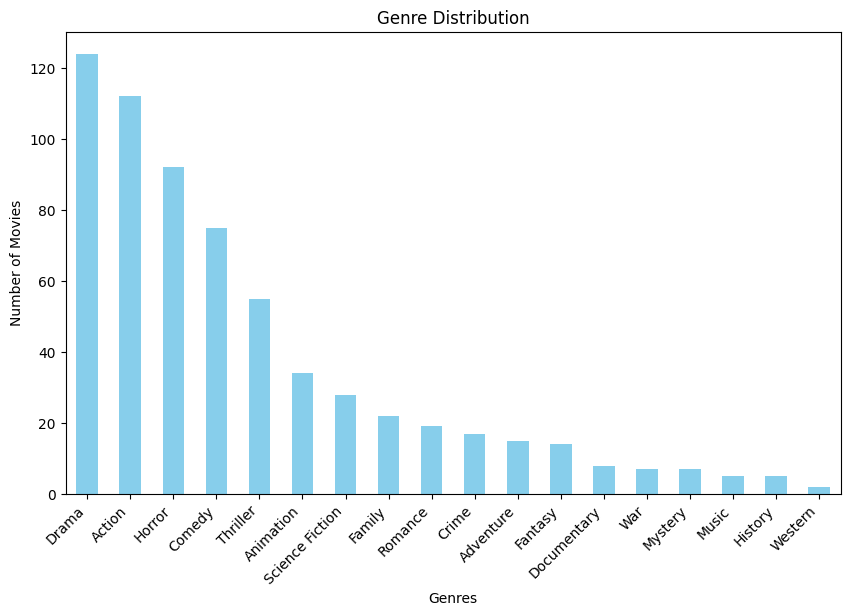

In [9]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

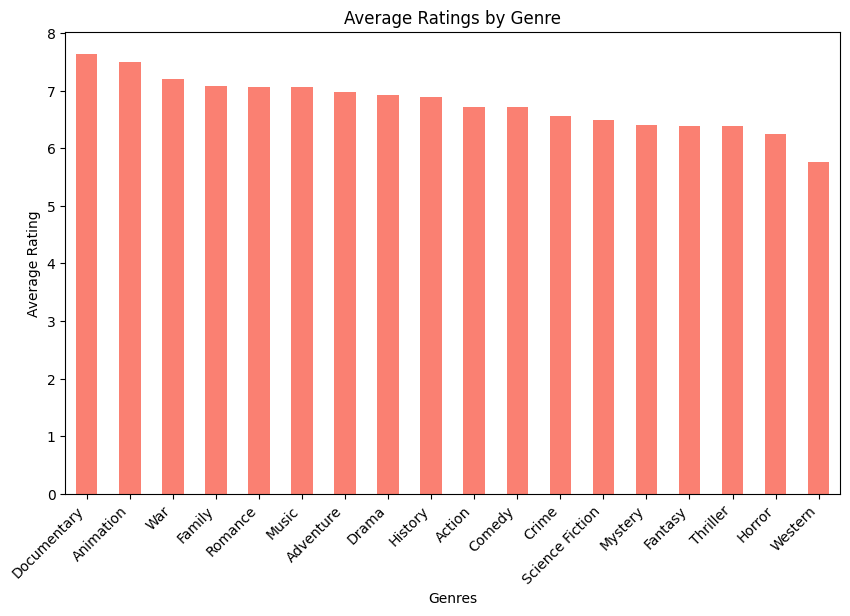

In [10]:
average_ratings = df.groupby('genres')['vote_average'].mean()

plt.figure(figsize=(10, 6))
average_ratings.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

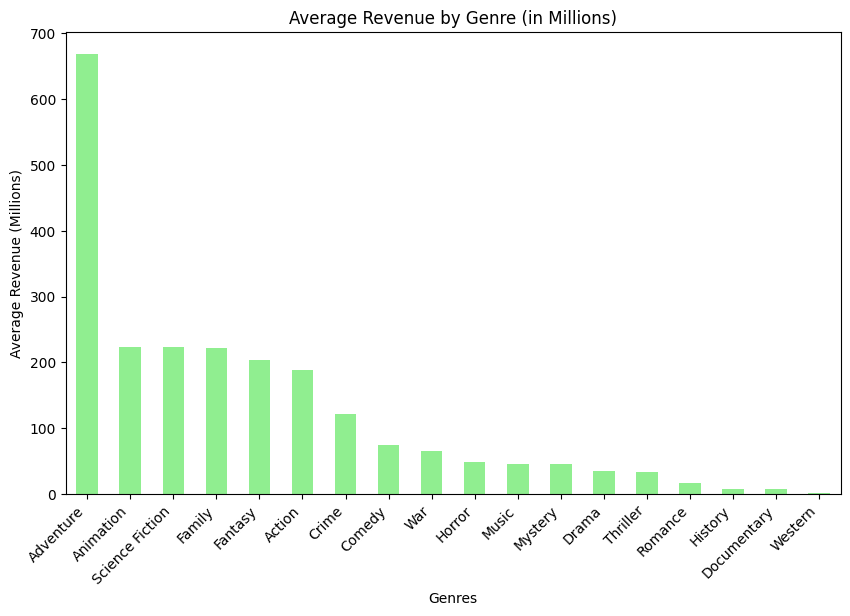

In [11]:
df['revenue_M'] = df['revenue'] / 1000000  # Adjust divisor based on your data's scale

# Calculate average revenue by genre
revenue_trends = df.groupby('genres')['revenue_M'].mean()

# Creating the plot
plt.figure(figsize=(10, 6))
revenue_trends.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Revenue by Genre (in Millions)')
plt.xlabel('Genres')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Explore how the popularity of different genres has changed over the years

Year distribution:
 Year
2019    193
2021    135
2020    127
2022    117
2023     69
Name: count, dtype: int64


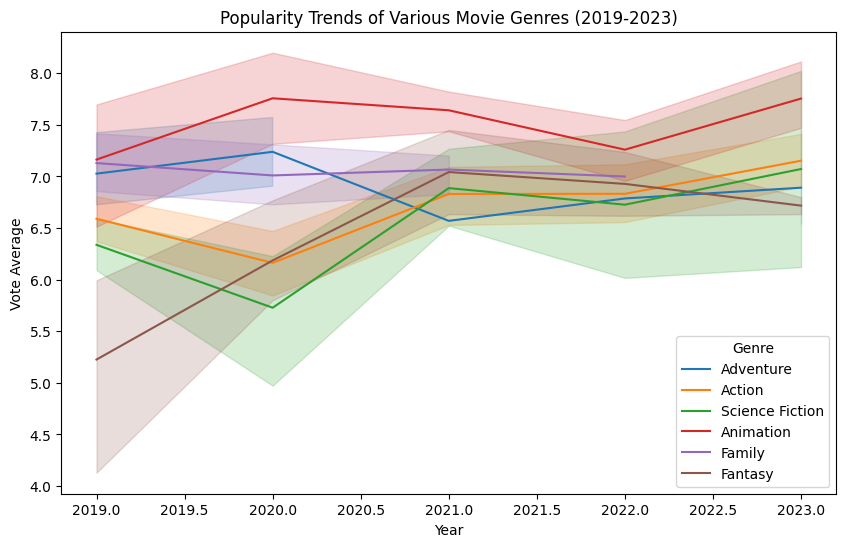

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  
df['Year'] = df['release_date'].dt.year

print("Year distribution:\n", df['Year'].value_counts())

df = df[df['Year'].between(2019, 2023)]

filtered_genres = ['Adventure', 'Action', 'Science Fiction', 'Animation', 'Family', 'Fantasy']
filtered_df = df[df['genres'].isin(filtered_genres)]

if filtered_df.empty:
    print("No data available for the specified years and genres.")
else:

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_df, x='Year', y='vote_average', hue='genres')

    plt.title('Popularity Trends of Various Movie Genres (2019-2023)')
    plt.xlabel('Year')
    plt.ylabel('Vote Average')
    plt.legend(title='Genre')
    plt.show()

In [13]:
df['license'].unique()

array(['PG-13', 'R', 'unknown', 'PG', 'G'], dtype=object)

# Investigate whether there are specific ratings that yield higher box office revenue.

In [14]:
df['license'].fillna('Unknown', inplace=True)

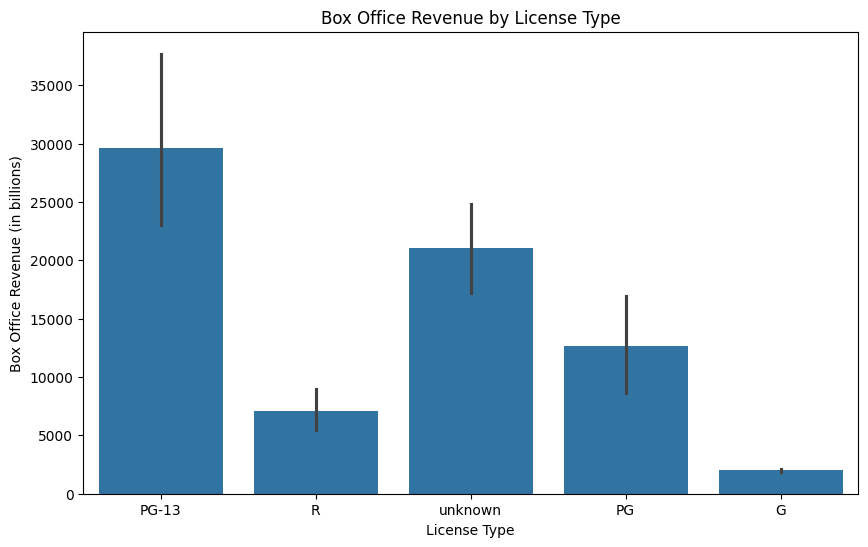

In [15]:
plt.figure(figsize=(10, 6))

sns.barplot(x='license', y='revenue_M', data=df, estimator=sum)

plt.title('Box Office Revenue by License Type')
plt.xlabel('License Type')
plt.ylabel('Box Office Revenue (in billions)')

plt.show()

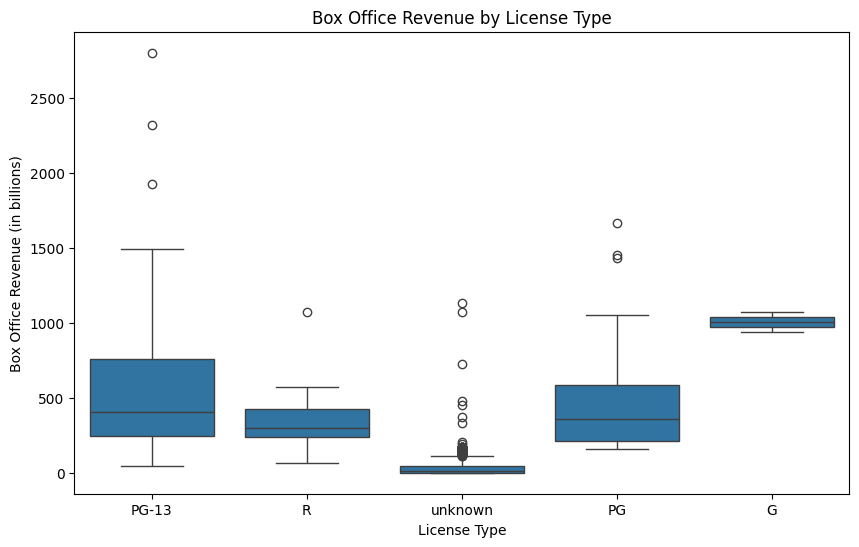

In [16]:

plt.figure(figsize=(10, 6))

sns.boxplot(x='license', y='revenue_M', data=df)

plt.title('Box Office Revenue by License Type')
plt.xlabel('License Type')
plt.ylabel('Box Office Revenue (in billions)')

plt.show()

In [18]:
df['license_int'] = df['license']

license_mapping = {'PG': 0, 'PG-13': 1, 'R': 2, 'U': 3, 'G': 4}
df['license_int'] = df['license_int'].map(license_mapping)

correlation = df[['license_int', 'revenue']].corr()

print(correlation)

             license_int   revenue
license_int     1.000000 -0.016743
revenue        -0.016743  1.000000


In [19]:
df.to_csv('../data_cleaned/questions2_5.csv')